# Codigo del proyecto

Librerías

In [390]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_text
import pandas as pd
# Opcional: Normaliza views
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np


Base de Datos

In [391]:
df = pd.read_csv('CAvideos_cc50_202101.csv', delimiter= ',')
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Manitoba,50.150025,-96.883322,POINT (-96.88332178 50.15002545)
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,British Columbia,49.099960,-116.516697,POINT (-116.516697 49.09996035)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,New Brunswick,45.267042,-66.076675,POINT (-66.07667505000001 45.26704185)
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097)
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Alberta,53.016698,-112.816639,POINT (-112.8166386 53.01669802)


**Verificamos la calidad de los datos float o int**

In [392]:
df.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04,40881.000000,40881.000000
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03,52.025876,-88.817702
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04,7.213076,25.119498
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00,44.566645,-139.000002
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02,46.249282,-110.733329
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03,49.822578,-81.236083
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03,53.016698,-64.347995
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06,68.767467,-57.426919


category_id es un identificador por lo que le pondremos como un object o category, también notamos que el valor minimo de las vistas es 733, los likes minimos es 0 junto con los dislikes y comment_count, la longitud y latitud está dentro del rango aceptable por lo que los datos estarían bien.

**Vamos a ver cuantos son los valores unicos que sean object y se puedan poner como category para ahorrar memoria**

In [393]:
#Categorical columns  - summary
df.describe(include='object')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description,state,geometry
count,40881,40881,40881,40881,40881,40881,40881,39585,40881,40881
unique,24427,205,24573,5076,23613,20157,24422,22345,13,13
top,l_lblj8Cq0o,17.14.11,Drake - God's Plan (Official Audio),SET India,2017-12-20T23:00:00.000Z,[none],https://i.ytimg.com/vi/UceaB4D0jpo/default.jpg,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,Quebec,POINT (-64.34799504 49.82257774)
freq,8,200,15,192,11,2385,8,130,3247,3247


Notamos que en tags hay valores [none] por lo que vamos a después transformarlo en NaN, tambén que hay solo 5mil unicos channel_title ,por lo que, para ahorrar espacio es mejor transformarlo en category, tranding_date es una fecha por lo que luego lo transfomaremos, en 'state' son pocos valores unicos por lo que también lo transformaremos en un valor unico

In [420]:
# Selecciona columnas que NO sean numéricas
non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns

# Crea tabla resumen
rare_categories_report = []

for col in non_numeric_cols:
    counts = df[col].value_counts()
    unique_values = counts.shape[0]
    rare_count = counts[counts == 1].shape[0]
    top_value = counts.idxmax()
    top_freq = counts.max()
    rare_percent = (rare_count / unique_values) * 100

    rare_categories_report.append({
        'Column': col,
        'Unique Values': unique_values,
        'Rare Values (# freq = 1)': rare_count,
        'Rare Values (%)': round(rare_percent, 2),
        'Most Frequent Value': top_value,
        'Top Value Freq': top_freq
    })

rare_df = pd.DataFrame(rare_categories_report)
print(rare_df)


           Column  Unique Values  Rare Values (# freq = 1)  Rare Values (%)  \
0        video_id          24427                     14516            59.43   
1           title          24573                     14758            60.06   
2   channel_title           5076                      1694            33.37   
3     category_id             17                         0             0.00   
4  thumbnail_link          24422                     14507            59.40   
5           state             13                         0             0.00   
6        geometry             13                         0             0.00   

                              Most Frequent Value  Top Value Freq  
0                                     l_lblj8Cq0o               8  
1             Drake - God's Plan (Official Audio)              15  
2                                       SET India             192  
3                                              24           13451  
4  https://i.ytimg.com/vi/U

#*Transformación de los datos*
- Se transforma los datos por la mejor opción

In [394]:
df['category_id'] = df['category_id'].astype('category')
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['state'] = df['state'].astype('category')
df['channel_title']=df['channel_title'].astype('category')

In [395]:
# Cantidad de los datos
df.shape

(40881, 20)

# Explorar y preparar el dataset

In [396]:
# Ver cuántos ceros hay en columnas clave
print((df['views'] == 0).sum())
print((df['likes'] == 0).sum())
print((df['comment_count'] == 0).sum())
print((df['lat'] == 0).sum())
print((df['lon'] == 0).sum())


0
284
646
0
0


In [397]:
# Verificar la calidad de datos
print(df.isnull().sum())
print(df.info())  # Tipo de dato y nulos


video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40881 non-null  object             
 1   trending_date           40881 non-null  datetime64[ns]    

cantidad de valores nulos, tags como none, o comments_disabled y ratings_disabled y compararlo con la cantidad de likes, dislikes y comment_count que son 0.

# Tratamiento de valores nulos o faltantes

In [398]:
# Cuántos registros tienen tags vacíos o '[none]'
tags_none_count = df[df['tags'].str.lower().isin(['[none]', 'none'])].shape[0]
print(f'Tags como none: {tags_none_count}')
# Cuántos tienen comments_disabled = True
comments_disabled_count = df[df['comments_disabled'] == True].shape[0]
# Cuántos tienen ratings_disabled = True
ratings_disabled_count = df[df['ratings_disabled'] == True].shape[0]

print(f'Comments Disabled: {comments_disabled_count}')
print(f'Ratings Disabled: {ratings_disabled_count}')
likes_zero = df[df['likes'] == 0].shape[0]
dislikes_zero = df[df['dislikes'] == 0].shape[0]
comments_zero = df[df['comment_count'] == 0].shape[0]

print(f'Likes en 0: {likes_zero}')
print(f'Dislikes en 0: {dislikes_zero}')
print(f'Comment_count en 0: {comments_zero}')


Tags como none: 2385
Comments Disabled: 583
Ratings Disabled: 279
Likes en 0: 284
Dislikes en 0: 393
Comment_count en 0: 646


In [399]:
print("\n Inconsistencias flags disabled:")

comments_inconsistent = df[(df['comments_disabled'] == True) & (df['comment_count'] > 0)]
print(f"Comments_disabled=True con comentarios >0: {comments_inconsistent.shape[0]}")

ratings_inconsistent = df[(df['ratings_disabled'] == True) & (df['likes'] > 0)]
print(f"Ratings_disabled=True con likes >0: {ratings_inconsistent.shape[0]}")



 Inconsistencias flags disabled:
Comments_disabled=True con comentarios >0: 0
Ratings_disabled=True con likes >0: 0


In [400]:
print("\nEstadísticas resumen:")
print(df.describe())



Estadísticas resumen:
                       trending_date         views         likes  \
count                          40881  4.088100e+04  4.088100e+04   
mean   2018-02-27 05:29:22.882512640  1.147036e+06  3.958269e+04   
min              2017-11-14 00:00:00  7.330000e+02  0.000000e+00   
25%              2018-01-04 00:00:00  1.439020e+05  2.191000e+03   
50%              2018-02-26 00:00:00  3.712040e+05  8.780000e+03   
75%              2018-04-24 00:00:00  9.633020e+05  2.871700e+04   
max              2018-06-14 00:00:00  1.378431e+08  5.053338e+06   
std                              NaN  3.390913e+06  1.326895e+05   

           dislikes  comment_count           lat           lon  
count  4.088100e+04   4.088100e+04  40881.000000  40881.000000  
mean   2.009195e+03   5.042975e+03     52.025876    -88.817702  
min    0.000000e+00   0.000000e+00     44.566645   -139.000002  
25%    9.900000e+01   4.170000e+02     46.249282   -110.733329  
50%    3.030000e+02   1.301000e+03     

**Quitamos los valores faltantes que son 0 y que esten activados los comentarios o reacciones, lo reemplazamos segun la proporción de visitas**

In [402]:

# Calcula proporciones medias
mean_likes_ratio = df.loc[df['likes'] > 0, 'likes'].sum() / df.loc[df['likes'] > 0, 'views'].sum()
mean_dislikes_ratio = df.loc[df['dislikes'] > 0, 'dislikes'].sum() / df.loc[df['dislikes'] > 0, 'views'].sum()
mean_comments_ratio = df.loc[df['comment_count'] > 0, 'comment_count'].sum() / df.loc[df['comment_count'] > 0, 'views'].sum()

print(f"Proporción promedio de likes: {mean_likes_ratio:.4f}")
print(f"Proporción promedio de dislikes: {mean_dislikes_ratio:.4f}")

# Crea funciones de imputación
def impute_likes(row):
    if row['likes'] == 0 and not row['ratings_disabled']:
        return int(row['views'] * mean_likes_ratio)
    else:
        return row['likes']

def impute_dislikes(row):
    if row['dislikes'] == 0 and not row['ratings_disabled']:
        return int(row['views'] * mean_dislikes_ratio)
    else:
        return row['dislikes']

def impute_comments(row):
    if row['comment_count'] == 0 and not row['comments_disabled']:
        return int(row['views'] * mean_comments_ratio)
    else:
        return row['comment_count']


# Aplica imputación
df['likes'] = df.apply(impute_likes, axis=1)
df['dislikes'] = df.apply(impute_dislikes, axis=1)
df['comment_count'] = df.apply(impute_comments, axis=1)


Proporción promedio de likes: 0.0348
Proporción promedio de dislikes: 0.0018


**Eliminamos columnas innecesarias**

In [403]:
# Eliminas columnas innecesarias
df.drop(['description', 'tags'], axis=1, inplace=True)

In [404]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Manitoba,50.150025,-96.883322,POINT (-96.88332178 50.15002545)
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,British Columbia,49.099960,-116.516697,POINT (-116.516697 49.09996035)
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,New Brunswick,45.267042,-66.076675,POINT (-66.07667505000001 45.26704185)
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,Saskatchewan,50.933311,-102.799989,POINT (-102.7999891 50.93331097)
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,Alberta,53.016698,-112.816639,POINT (-112.8166386 53.01669802)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07+00:00,80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,Manitoba,50.150025,-96.883322,POINT (-96.88332178 50.15002545)
40877,8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18+00:00,103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,Newfoundland And Labrador,49.174400,-57.426919,POINT (-57.42691878 49.17440025)
40878,GWlKEM3m2EE,2018-06-14,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11 17:30:53+00:00,773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Yukon,61.350375,-139.000002,POINT (-139.0000017 61.35037539)
40879,lbMKLzQ4cNQ,2018-06-14,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13 04:00:05+00:00,115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Yukon,61.350375,-139.000002,POINT (-139.0000017 61.35037539)


#**Vamos a buscar valores incoherentes**

views: valores < 0 = 0
likes: valores < 0 = 0
dislikes: valores < 0 = 0
comment_count: valores < 0 = 0
Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, state, lat, lon, geometry]
Index: []
Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, state, lat, lon, geometry]
Index: []


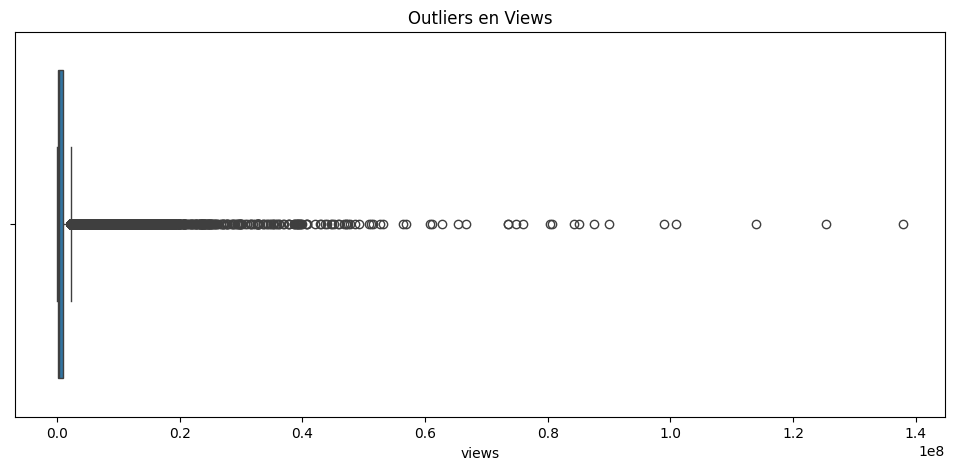

count    4.088100e+04
mean     1.147036e+06
std      3.390913e+06
min      7.330000e+02
25%      1.439020e+05
50%      3.712040e+05
75%      9.633020e+05
max      1.378431e+08
Name: views, dtype: float64


In [405]:
# Revisar valores negativos
num_cols = ['views', 'likes', 'dislikes', 'comment_count']
for col in num_cols:
    print(f"{col}: valores < 0 = {(df[col] < 0).sum()}")
# Casos con comments deshabilitados pero contados
df[(df['comments_disabled'] == True) & (df['comment_count'] > 0)]

# Casos con ratings deshabilitados pero likes o dislikes > 0
df[(df['ratings_disabled'] == True) & ((df['likes'] > 0) | (df['dislikes'] > 0))]
print(df[(df['lat'] < -90) | (df['lat'] > 90)])
print(df[(df['lon'] < -180) | (df['lon'] > 180)])

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['views'])
plt.title('Outliers en Views')
plt.show()

print(df['views'].describe())


#**Valores atipicos**

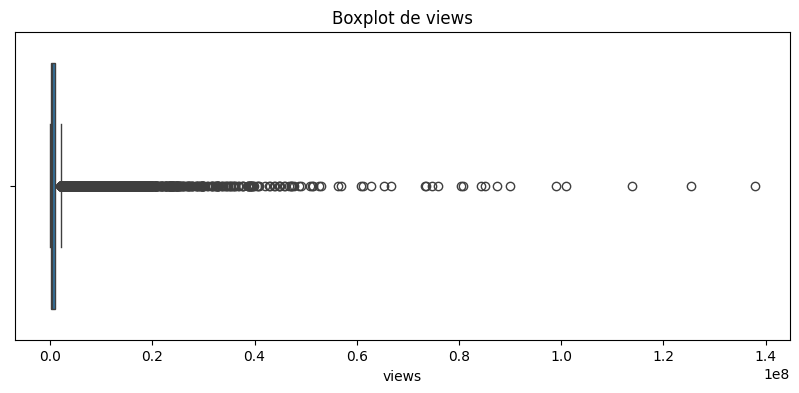

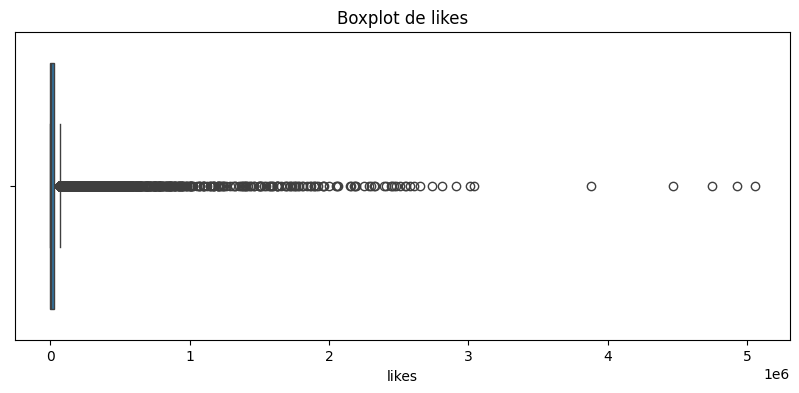

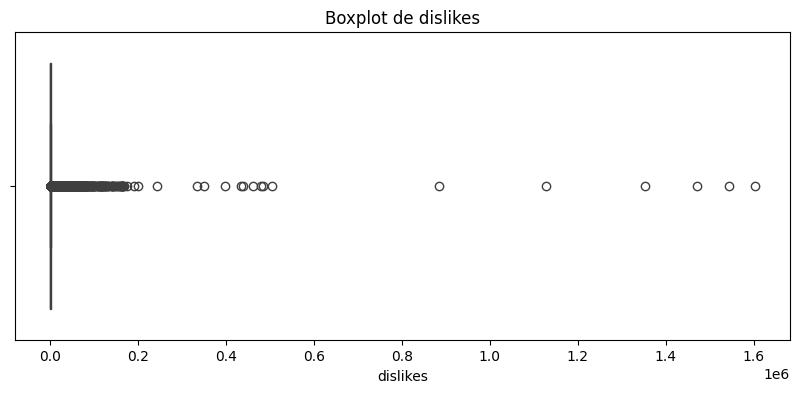

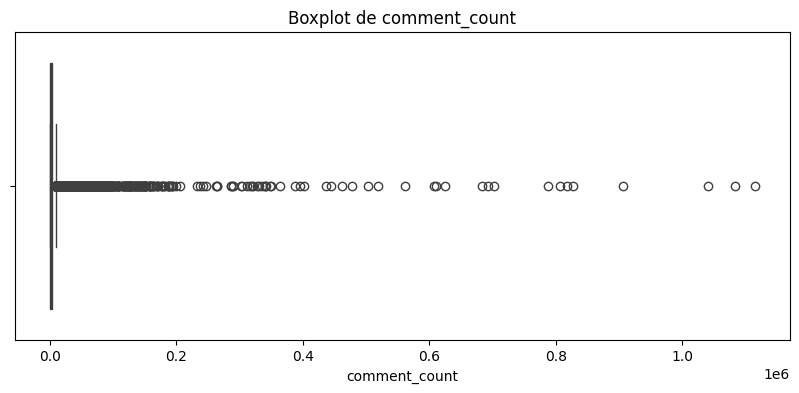

        Variable        Q1        Q3       IQR  Lower Limit  Upper Limit  \
0          views  143902.0  963302.0  819400.0   -1085198.0    2192402.0   
1          likes    2192.0   28717.0   26525.0     -37595.5      68504.5   
2       dislikes      99.0     950.0     851.0      -1177.5       2226.5   
3  comment_count     418.0    3714.0    3296.0      -4526.0       8658.0   

   Outliers Below  Outliers Above  Total Outliers  
0               0            4464            4464  
1               0            5045            5045  
2               0            5337            5337  
3               0            4877            4877  


In [407]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas clave
numeric_cols = ['views', 'likes', 'dislikes', 'comment_count']

# DataFrame para guardar stats
outlier_stats = []

for col in numeric_cols:
    # Calcular IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Contar outliers
    outliers_below = df[df[col] < lower_limit].shape[0]
    outliers_above = df[df[col] > upper_limit].shape[0]
    total_outliers = outliers_below + outliers_above

    # Guardar resultados
    outlier_stats.append({
        'Variable': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Limit': lower_limit,
        'Upper Limit': upper_limit,
        'Outliers Below': outliers_below,
        'Outliers Above': outliers_above,
        'Total Outliers': total_outliers
    })

    # Visualización
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# Mostrar tabla resumen
outlier_summary = pd.DataFrame(outlier_stats)
print(outlier_summary)


**Reemplazamos los valores atipicos con las proporción de views y lo ponemos en nuevas columnas**

In [417]:
# --------------------------
# 1. Calcular proporción media likes/views SIN outliers
valid = df[(df['likes'] > 0) & (df['views'] > 0)]
likes_ratio = valid['likes'].sum() / valid['views'].sum()

# 2. Calcular IQR
Q1 = df['likes'].quantile(0.00)
Q3 = df['likes'].quantile(0.99)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

# 3. Crear columna nueva: likes_sin_atipico
df['likes_sin_atipico'] = np.where(
    df['likes'] > upper_limit,
    (df['views'] * likes_ratio).round().astype(int),
    df['likes']  # Si no es atípico, se queda igual
)

# --------------------------
# Lo mismo para dislikes:
valid = df[(df['dislikes'] > 0) & (df['views'] > 0)]
dislikes_ratio = valid['dislikes'].sum() / valid['views'].sum()

Q1 = df['dislikes'].quantile(0.00)
Q3 = df['dislikes'].quantile(0.99)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

df['dislikes_sin_atipico'] = np.where(
    df['dislikes'] > upper_limit,
    (df['views'] * dislikes_ratio).round().astype(int),
    df['dislikes']
)

# --------------------------
# Lo mismo para comment_count:
valid = df[(df['comment_count'] > 0) & (df['views'] > 0)]
comments_ratio = valid['comment_count'].sum() / valid['views'].sum()

Q1 = df['comment_count'].quantile(0.00)
Q3 = df['comment_count'].quantile(0.99)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

df['comment_count_sin_atipico'] = np.where(
    df['comment_count'] > upper_limit,
    (df['views'] * comments_ratio).round().astype(int),
    df['comment_count']
)

print(df[['likes', 'likes_sin_atipico', 'dislikes', 'dislikes_sin_atipico', 'comment_count', 'comment_count_sin_atipico']].head())

     likes  likes_sin_atipico  dislikes  dislikes_sin_atipico  comment_count  \
0   787425             787425     43420                 43420         125882   
1   127794             127794      1688                  1688          13030   
2   146035             146035      5339                  5339           8181   
3   132239             132239      1989                  1989          17518   
4  1634130            1166451     21082                 21082          85067   

   comment_count_sin_atipico  
0                     125882  
1                      13030  
2                       8181  
3                      17518  
4                      85067  


**Comparación de antes y después**

In [418]:
# Likes: antes y después del tratamiento
print("\n=== Likes ===")
print("Original:")
print(df['likes'].describe())
print("\nSin atípicos:")
print(df['likes_sin_atipico'].describe())

# Dislikes: antes y después
print("\n=== Dislikes ===")
print("Original:")
print(df['dislikes'].describe())
print("\nSin atípicos:")
print(df['dislikes_sin_atipico'].describe())

# Comment_count: antes y después
print("\n=== Comment Count ===")
print("Original:")
print(df['comment_count'].describe())
print("\nSin atípicos:")
print(df['comment_count_sin_atipico'].describe())



=== Likes ===
Original:
count    4.088100e+04
mean     3.958280e+04
std      1.326895e+05
min      0.000000e+00
25%      2.192000e+03
50%      8.780000e+03
75%      2.871700e+04
max      5.053338e+06
Name: likes, dtype: float64

Sin atípicos:
count    4.088100e+04
mean     3.826275e+04
std      1.172519e+05
min      0.000000e+00
25%      2.192000e+03
50%      8.780000e+03
75%      2.871700e+04
max      4.796235e+06
Name: likes_sin_atipico, dtype: float64

=== Dislikes ===
Original:
count    4.088100e+04
mean     2.009228e+03
std      1.900837e+04
min      0.000000e+00
25%      9.900000e+01
50%      3.030000e+02
75%      9.500000e+02
max      1.602383e+06
Name: dislikes, dtype: float64

Sin atípicos:
count     40881.000000
mean       1568.206575
std        5547.812661
min           0.000000
25%          99.000000
50%         303.000000
75%         950.000000
max      243458.000000
Name: dislikes_sin_atipico, dtype: float64

=== Comment Count ===
Original:
count    4.088100e+04
mean    

In [419]:
# Cuantás columnas tenemos
print(df.columns)


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'state', 'lat', 'lon', 'geometry',
       'likes_sin_atipico', 'dislikes_sin_atipico',
       'comment_count_sin_atipico'],
      dtype='object')


In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   video_id                   40881 non-null  object             
 1   trending_date              40881 non-null  datetime64[ns]     
 2   title                      40881 non-null  object             
 3   channel_title              40881 non-null  category           
 4   category_id                40881 non-null  category           
 5   publish_time               40881 non-null  datetime64[ns, UTC]
 6   views                      40881 non-null  int64              
 7   likes                      40881 non-null  int64              
 8   dislikes                   40881 non-null  int64              
 9   comment_count              40881 non-null  int64              
 10  thumbnail_link             40881 non-null  object             
 11  co

**Creamos nuevas columnas y eliminamos columnas**

In [422]:
df['likes_dislikes_ratio'] = np.where(
    df['dislikes'] == 0,   # condición
    0,                     # valor si dislikes == 0
    df['likes'] / df['dislikes']   # valor si dislikes > 0
)

In [423]:
df = df.drop('thumbnail_link', axis=1)


#**Modelado**

#Análisis de Correlación

<Axes: >

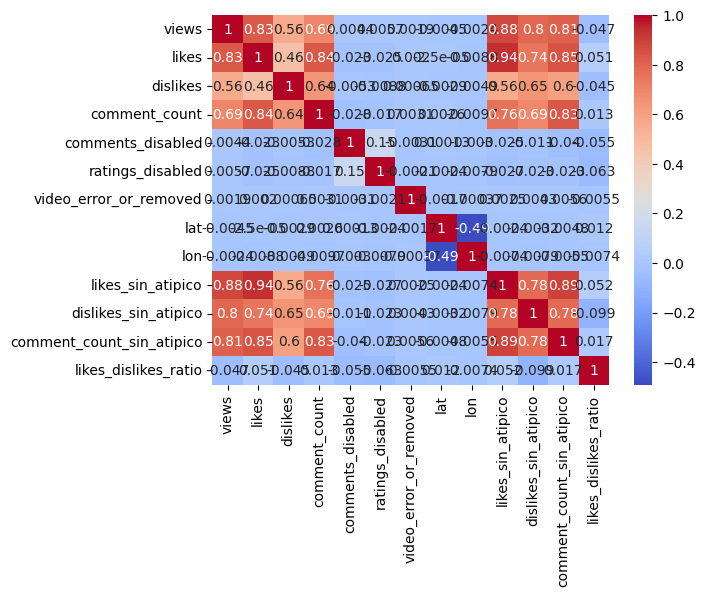

In [424]:
df_num = df.select_dtypes(include=['float64', 'int64', 'bool'])
sns.heatmap(df_num.corr(), cmap='coolwarm', annot=True)



# Definición de variables

In [425]:

scaler = MinMaxScaler()
df['views_scaled'] = scaler.fit_transform(df[['views']])
df['comment_count_scaled'] = scaler.fit_transform(df[['comment_count']])

X = df[['views_scaled', 'comment_count_scaled', 'channel_title']]
y = df['likes']


Dividimos los datos en un 90% para entrenamiento y un 10% para prueba.

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [427]:
# Calcula target encoding solo con X_train
channel_mean_views = X_train.join(y_train).groupby('channel_title')['likes'].mean()


/tmp/ipython-input-427-3068699560.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_mean_views = X_train.join(y_train).groupby('channel_title')['likes'].mean()


In [428]:
# Aplica el encoding
X_train['channel_title_encoded'] = X_train['channel_title'].map(channel_mean_views)
X_test['channel_title_encoded'] = X_test['channel_title'].map(channel_mean_views)


In [429]:

# Opcional: rellena canales desconocidos con un valor (como el promedio global)
X_test['channel_title_encoded'].fillna(y_train.mean(), inplace=True)


/tmp/ipython-input-429-2866305275.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['channel_title_encoded'].fillna(y_train.mean(), inplace=True)


In [430]:
from sklearn.preprocessing import MinMaxScaler

scaler_channel = MinMaxScaler()
X_train['channel_title_encoded_scaled'] = scaler_channel.fit_transform(
    X_train[['channel_title_encoded']]
)
X_test['channel_title_encoded_scaled'] = scaler_channel.transform(
    X_test[['channel_title_encoded']]
)

# Luego usas la versión escalada:
X_train = X_train[['views_scaled', 'comment_count_scaled', 'channel_title_encoded_scaled']]
X_test = X_test[['views_scaled', 'comment_count_scaled', 'channel_title_encoded_scaled']]


In [431]:
# Entrena el modelo
tree_model = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=10)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)

In [432]:
X_train.shape

(36792, 3)

In [433]:
X_test.shape

(4089, 3)

**Modelo de Árbol de Decisión**

In [434]:

param_grid = {
    'max_depth': [4, 6, 8, 10, 12, 15,20],
    'min_samples_split': [2, 5, 10, 20]
}
# Define el modelo base
tree = DecisionTreeRegressor(random_state=42)

# Define GridSearchCV
grid_search = GridSearchCV(estimator=tree,
                           param_grid=param_grid,
                           cv=5,               # 5-fold cross-validation
                           scoring='r2',       # Métrica que optimizas
                           n_jobs=-1)          # Usa todos los núcleos disponibles
# Ajusta con tus datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mira los mejores parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor score R² promedio:", grid_search.best_score_)
# Predice con el mejor estimador
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)




# Métricas
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


Mejores parámetros encontrados: {'max_depth': 12, 'min_samples_split': 5}
Mejor score R² promedio: 0.949099126061139
R²: 0.9623577991679159
MAE: 9808.950169809335
RMSE: 27903.76426335984


Predicción del Modelo

In [435]:
y_pred = tree_model.predict(X_test)
y_pred

array([29461.93220339,   199.190899  , 23321.1942446 , ...,
        5120.40961098, 13117.94936709, 37517.15028902])

In [436]:
df_pred = pd.DataFrame(X_test)
df_pred = df_pred.assign(Likes=y_test)
df_pred = df_pred.assign(Pred = y_pred.flatten().tolist())
df_pred.head(20)

,views_scaled,comment_count_scaled,channel_title_encoded_scaled,Likes,Pred
3719,0.011772,0.000741,0.015911,17553,29461.932203
36535,0.000529,0.000070,0.000052,111,199.190899
15981,0.003007,0.017329,0.009727,35691,23321.194245
11810,0.005832,0.001252,0.013984,17493,30995.655556
15278,0.001717,0.001105,0.001845,5536,5043.962433
18210,0.005287,0.000667,0.002756,6257,5043.962433
15503,0.000149,0.000722,0.000492,2453,861.160823
13702,0.000606,0.000282,0.015667,263,4085.587838
40626,0.001821,0.001409,0.000979,3352,2238.843278
3102,0.000370,0.000059,0.000260,311,861.160823


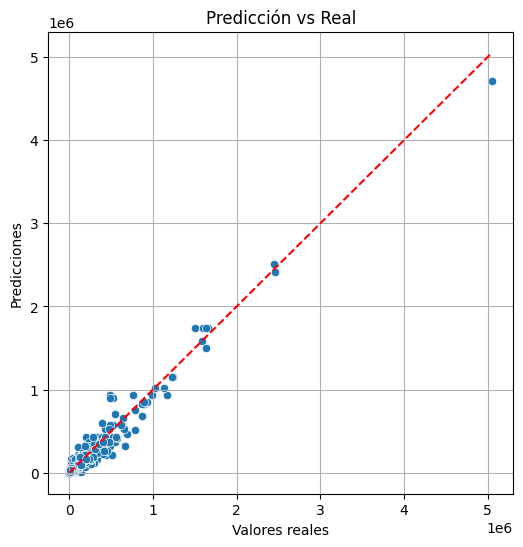

In [437]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicción vs Real')
plt.grid(True)
plt.show()

Visualizar el árbol de decisión

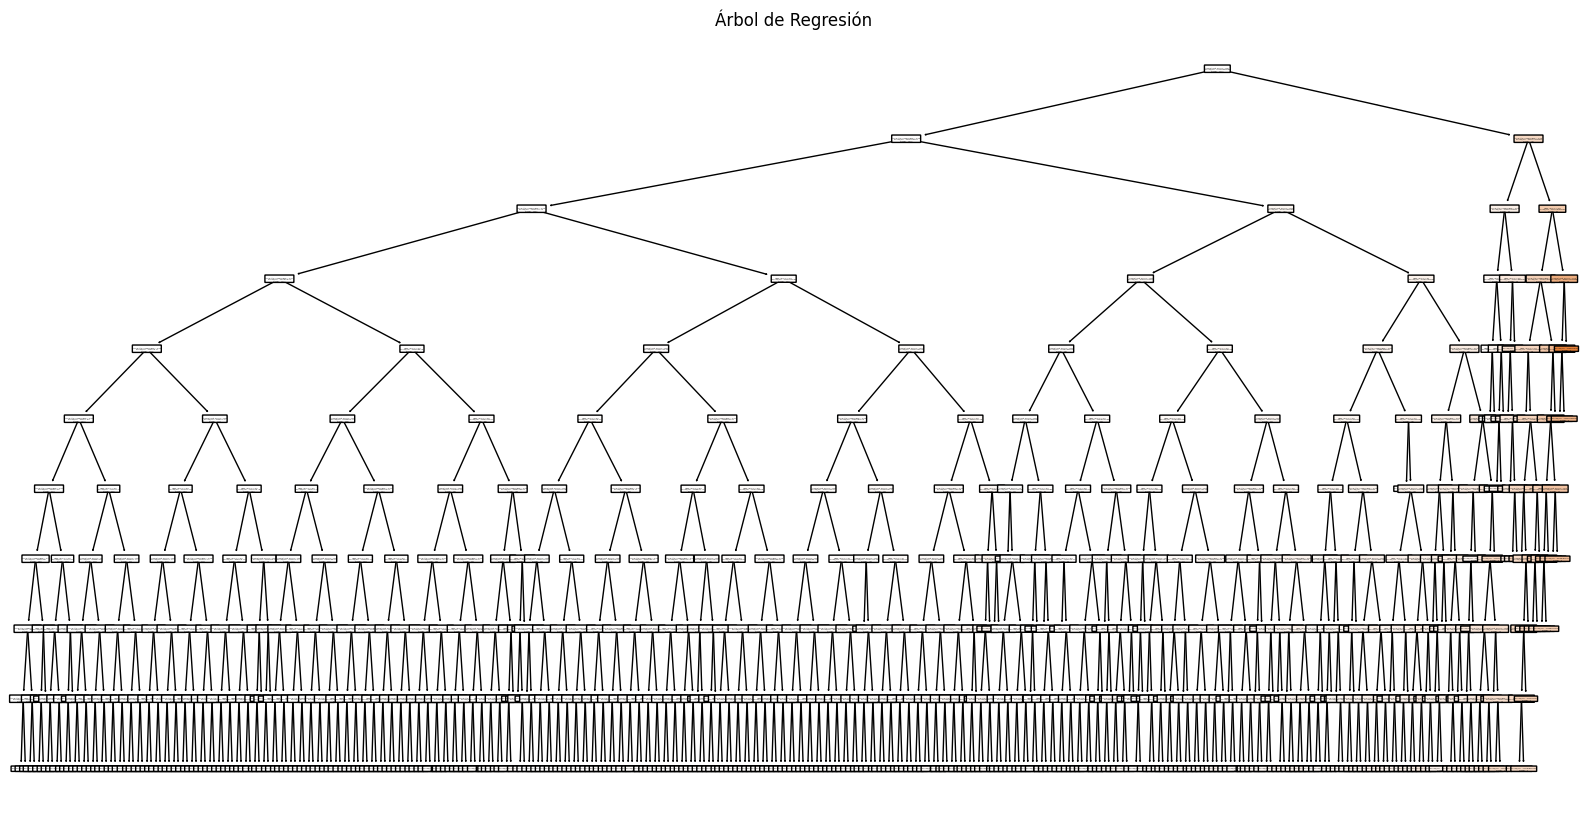

In [367]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X_test.columns, filled=True, rounded=True)
plt.title("Árbol de Regresión")
plt.show()

In [438]:
reglas = export_text(tree_model, feature_names=list(X.columns))
print(reglas)

|--- comment_count_scaled <= 0.09
|   |--- channel_title <= 0.06
|   |   |--- channel_title <= 0.02
|   |   |   |--- channel_title <= 0.01
|   |   |   |   |--- channel_title <= 0.00
|   |   |   |   |   |--- channel_title <= 0.00
|   |   |   |   |   |   |--- channel_title <= 0.00
|   |   |   |   |   |   |   |--- channel_title <= 0.00
|   |   |   |   |   |   |   |   |--- channel_title <= 0.00
|   |   |   |   |   |   |   |   |   |--- channel_title <= 0.00
|   |   |   |   |   |   |   |   |   |   |--- value: [51.15]
|   |   |   |   |   |   |   |   |   |--- channel_title >  0.00
|   |   |   |   |   |   |   |   |   |   |--- value: [199.19]
|   |   |   |   |   |   |   |   |--- channel_title >  0.00
|   |   |   |   |   |   |   |   |   |--- views_scaled <= 0.01
|   |   |   |   |   |   |   |   |   |   |--- value: [432.81]
|   |   |   |   |   |   |   |   |   |--- views_scaled >  0.01
|   |   |   |   |   |   |   |   |   |   |--- value: [2620.67]
|   |   |   |   |   |   |   |--- channel_title >  0.0

Nodo Raíz comment_count_scaled <= 0.09





Resumen

-Cada nodo en el árbol representa una división basada en una condición, y cada ruta desde la raíz hasta una hoja es una combinación de decisiones que llevan a una predicción.

-El modelo predice un valor promedio en cada hoja para las muestras que cumplen las condiciones de esa ruta.

-La intensidad de color de las hojas facilita la visualización de valores altos y bajos predichos por el modelo.


🧠 ¿Cómo podrías usar esto?     
✔️ Para documentar la lógica del modelo.

✔️ Para implementarlo en un sistema que no use machine learning directamente (por ejemplo, Excel o una app).

✔️ Para presentar al equipo no técnico una explicación comprensible del modelo.

**Evaluación del modelo**

In [439]:
# calcular estas métricas
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 10057.027685690271
MSE: 754251199.2270261
RMSE: 27463.634122727206


In [440]:
# Precisiòn del Modelo (Coeficiente de determinación)
print("Precisión del Modelo: ",metrics.r2_score(y_test,y_pred))

Precisión del Modelo:  0.9635359059246842


La precisiòn es buena, ya que este valor està cercano a la unidad.

Residuales

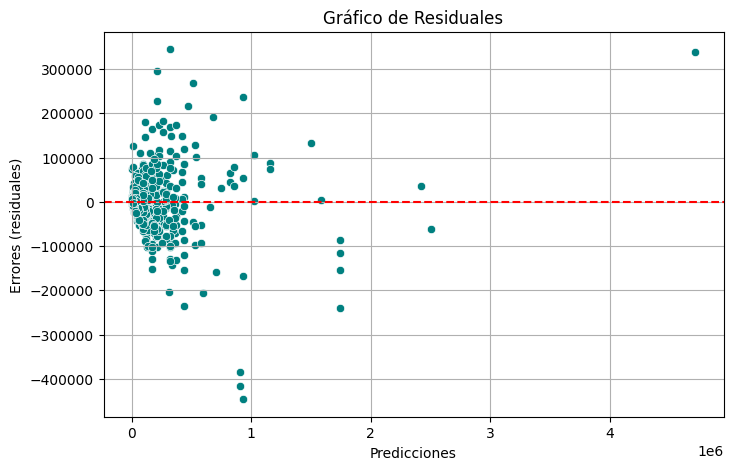

In [441]:
residuals = y_test.values - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, color='teal')
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Residuales')
plt.xlabel('Predicciones')
plt.ylabel('Errores (residuales)')
plt.grid(True)
plt.show()

➡️ Interpretación:        
Hay observaciones que el modelo no logra predecir bien. Pueden distorsionar los resultados.

# Segunda prueba, pero no es valido

Missing values per column:
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64
Shape of X_train: (32704, 1)
Shape of X_test: (8177, 1)
Shape of y_train: (32704, 1)
Shape of y_test: (8177, 1)
Datos del modelo de Regresión Lineal Múltiple

Pendiente:  [[21.10913479]]
Interceptor:  [310444.52828498]
       Coeficiente
likes    21.109135


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


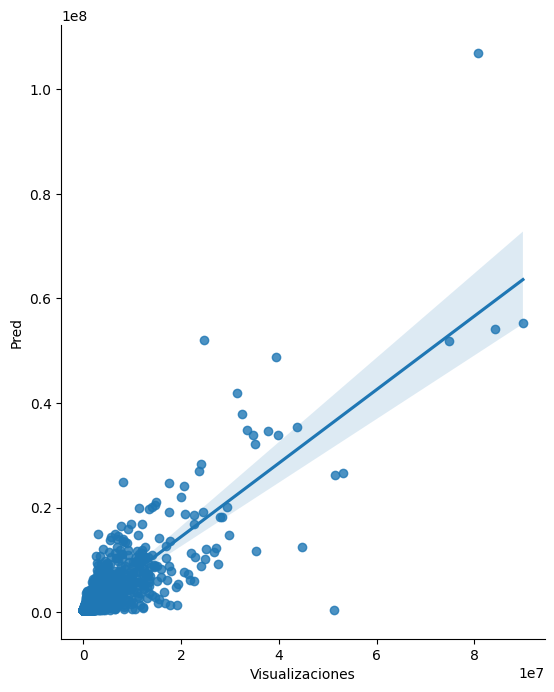

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
df = pd.read_csv('CAvideos_cc50_202101.csv')
print("Missing values per column:")
print(df.isnull().sum())
X=df[['likes']]
y=df[['views']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
#Definimos el algoritmo a utilizar y entrenamos el modelo
modelo_rm=LinearRegression()
modelo_rm.fit(X_train,y_train)
print('Datos del modelo de Regresión Lineal Múltiple')
print()
print("Pendiente: ",modelo_rm.coef_)
print("Interceptor: ",modelo_rm.intercept_)
coef_df = pd.DataFrame(modelo_rm.coef_[0], X.columns, columns=['Coeficiente'])
print(coef_df)
#Realizamos una predicción
Y_pred = modelo_rm.predict(X_test)
Y_pred
df_pred = pd.DataFrame(X_test)
df_pred = df_pred.assign(Visualizaciones=y_test)
df_pred = df_pred.assign(Pred = Y_pred.flatten().tolist())
df_pred.head(10)
sns.pairplot(df_pred, x_vars=['Visualizaciones'], y_vars='Pred', size=7, aspect=0.8,kind = 'reg')


#**Requerimientos**


/tmp/ipython-input-442-4281299010.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categorias.values, y=top_categorias.index, palette='mako')


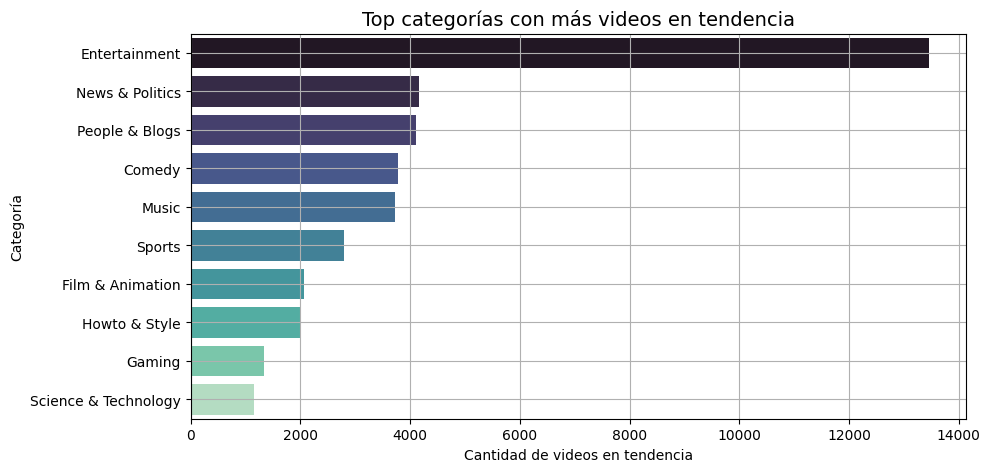

In [442]:
#¿Qué categorías de videos son las de mayor tendencia?
import json

# Cargar archivo JSON
with open('CA_category_id.json') as f:
    categorias_json = json.load(f)

# Crear diccionario de ID a título
categoria_dict = {}
for item in categorias_json['items']:
    cat_id = int(item['id'])
    cat_title = item['snippet']['title']
    categoria_dict[cat_id] = cat_title

# Crear nueva columna con nombres de categoría
df['category_name'] = df['category_id'].map(categoria_dict)

# conteo de videos por nombre de categoría
top_categorias = df['category_name'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_categorias.values, y=top_categorias.index, palette='mako')
plt.title('Top categorías con más videos en tendencia', fontsize=14)
plt.xlabel('Cantidad de videos en tendencia')
plt.ylabel('Categoría')
plt.grid(True)
plt.show()

/tmp/ipython-input-443-2080488633.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=likes_por_categoria.head(10).values, y=likes_por_categoria.head(10).index, palette='crest')


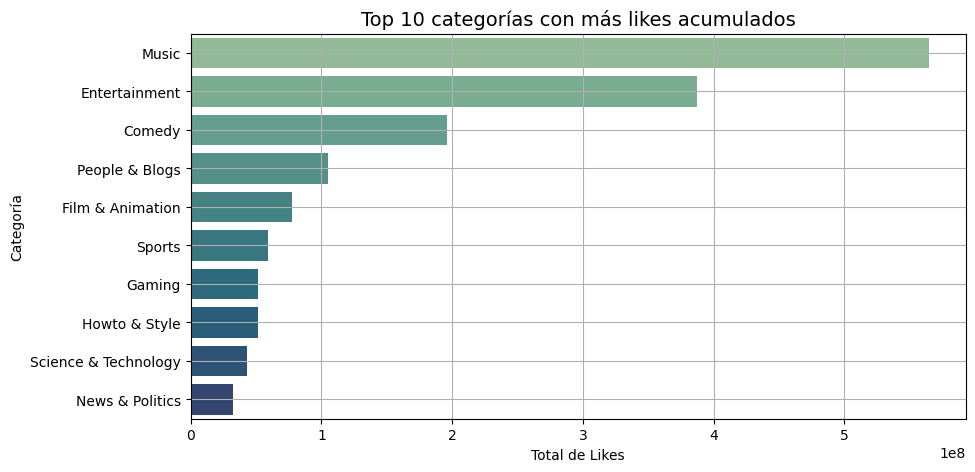

In [443]:
#¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?
# Agrupar por categoría y sumar los likes
likes_por_categoria = df.groupby('category_name')['likes'].sum().sort_values(ascending=False)
#print("Categorías con más 'likes':")  #mas gustados
#print(likes_por_categoria.head(5))

#print("\nCategorías con menos 'likes':") #menos gustados
#print(likes_por_categoria.tail(5))
plt.figure(figsize=(10,5))
sns.barplot(x=likes_por_categoria.head(10).values, y=likes_por_categoria.head(10).index, palette='crest')
plt.title('Top 10 categorías con más likes acumulados', fontsize=14)
plt.xlabel('Total de Likes')
plt.ylabel('Categoría')
plt.grid(True)
plt.show()

/tmp/ipython-input-444-3607272514.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratio_promedio.head(10).values, y=ratio_promedio.head(10).index, palette='flare')


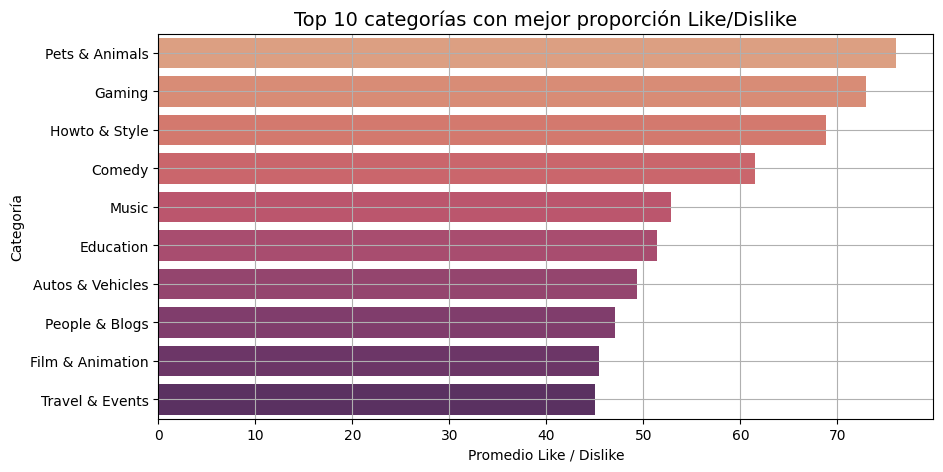

In [444]:
#¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?
#Ratio alto → el público aprueba mucho más que desaprueba/ Ratio bajo → el video es mal recibido.
# se filtar los dislikes mayores acreos para evitar la división por cero
df_ratio = df[df['dislikes'] > 0].copy()

# Creamos columna con el ratio de likes a dislikes
df_ratio['like_dislike_ratio'] = df_ratio['likes'] / df_ratio['dislikes']
# Promedio del ratio por categoría
ratio_promedio = df_ratio.groupby('category_name')['like_dislike_ratio'].mean().sort_values(ascending=False)
#print("Categorías con mejor ratio Like/Dislike:")
#print(ratio_promedio.head(5))

#print("\nCategorías con peor ratio Like/Dislike:")
#print(ratio_promedio.tail(5))

plt.figure(figsize=(10,5))
sns.barplot(x=ratio_promedio.head(10).values, y=ratio_promedio.head(10).index, palette='flare')
plt.title('Top 10 categorías con mejor proporción Like/Dislike', fontsize=14)
plt.xlabel('Promedio Like / Dislike')
plt.ylabel('Categoría')
plt.grid(True)
plt.show()

/tmp/ipython-input-445-1813282812.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratio_vc_promedio.head(10).values, y=ratio_vc_promedio.head(10).index, palette='light:b')


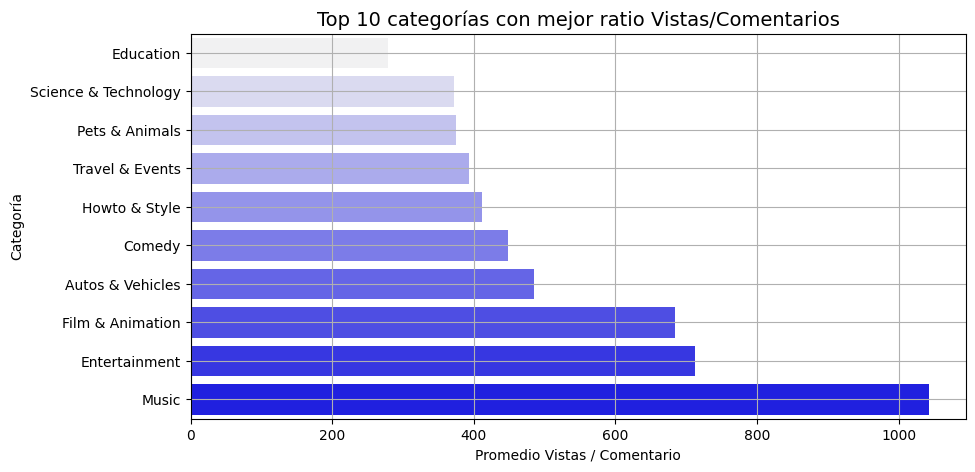

In [445]:
#¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?
#Un ratio bajo significa que los videos generan muchos comentarios por vista./Un ratio alto = pocos comentarios a pesar de muchas vistas.

df_ratio_coment = df[df['comment_count'] > 0].copy()
df_ratio_coment['views_comment_ratio'] = df_ratio_coment['views'] / df_ratio_coment['comment_count']

#promedio del ratio por categoria
ratio_vc_promedio = df_ratio_coment.groupby('category_name')['views_comment_ratio'].mean().sort_values()
plt.figure(figsize=(10,5))
sns.barplot(x=ratio_vc_promedio.head(10).values, y=ratio_vc_promedio.head(10).index, palette='light:b')
plt.title('Top 10 categorías con mejor ratio Vistas/Comentarios', fontsize=14)
plt.xlabel('Promedio Vistas / Comentario')
plt.ylabel('Categoría')
plt.grid(True)
plt.show()

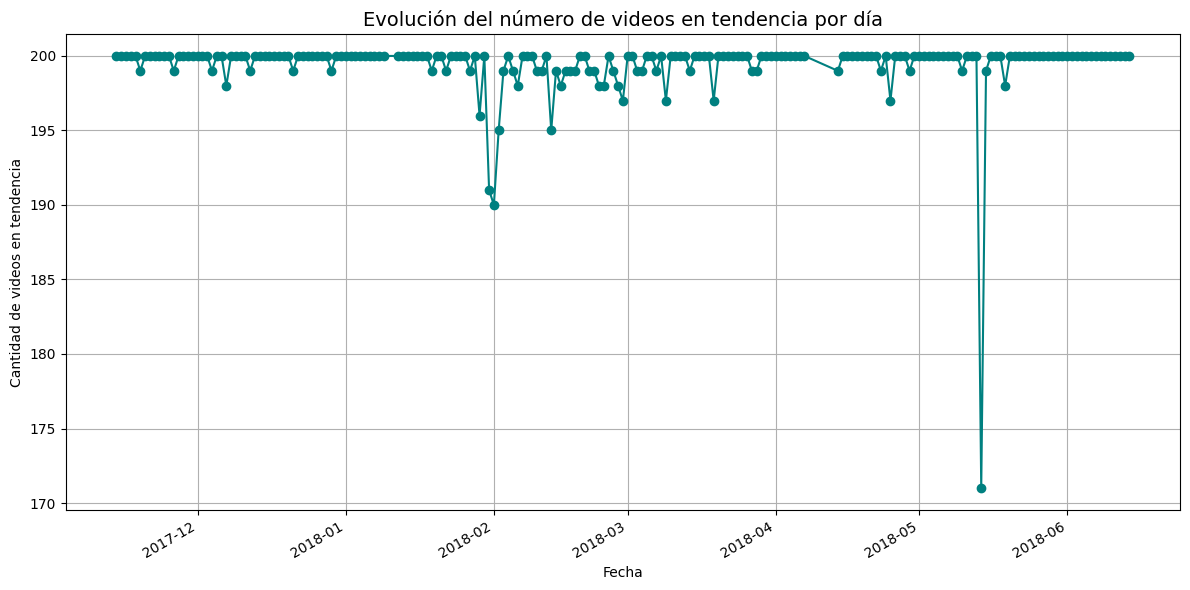

In [446]:
#¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?
# Agrupar por fecha de tendencia y contar cuántos videos hubo cada día

tendencia_por_fecha = df['trending_date'].value_counts().sort_index()



# Visualizar la evolución con un gráfico de línea
plt.figure(figsize=(12,6))
tendencia_por_fecha.plot(kind='line', color='teal', marker='o')
plt.title('Evolución del número de videos en tendencia por día', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de videos en tendencia')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#¿Qué canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?
# veces que aparece un canal en el dataset

canales_frecuencia = df['channel_title'].value_counts()

# Canales más frecuentes en tendencia (Top 10)
top_canales = canales_frecuencia.head(10)

# Canales menos frecuentes que solo aparecieron una vez
canales_menos_frecuentes = canales_frecuencia[canales_frecuencia == 1]

# Tomamos una muestra de 10 canales
muestra_menos_frecuentes = canales_menos_frecuentes.sample(10, random_state=42)


# gráficos comparativos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Canales más frecuentes

sns.barplot(x=top_canales.values, y=top_canales.index, palette='magma', ax=axes[0])
axes[0].set_title('Top 10 canales con más videos en tendencia', fontsize=14)
axes[0].set_xlabel('Cantidad de videos')
axes[0].set_ylabel('Canal')
axes[0].grid(True)

# Gráfico 2: Canales con solo una aparición
sns.barplot(x=muestra_menos_frecuentes.values, y=muestra_menos_frecuentes.index, palette='coolwarm', ax=axes[1])
axes[1].set_title('Canales con solo 1 video en tendencia', fontsize=14)
axes[1].set_xlabel('Cantidad de videos')
axes[1].set_ylabel('Canal')
axes[1].grid(True)

plt.tight_layout()
plt.show()

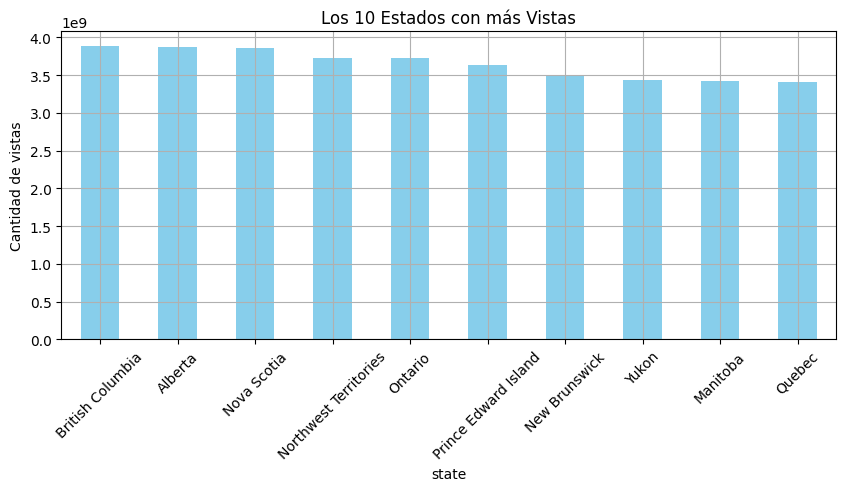

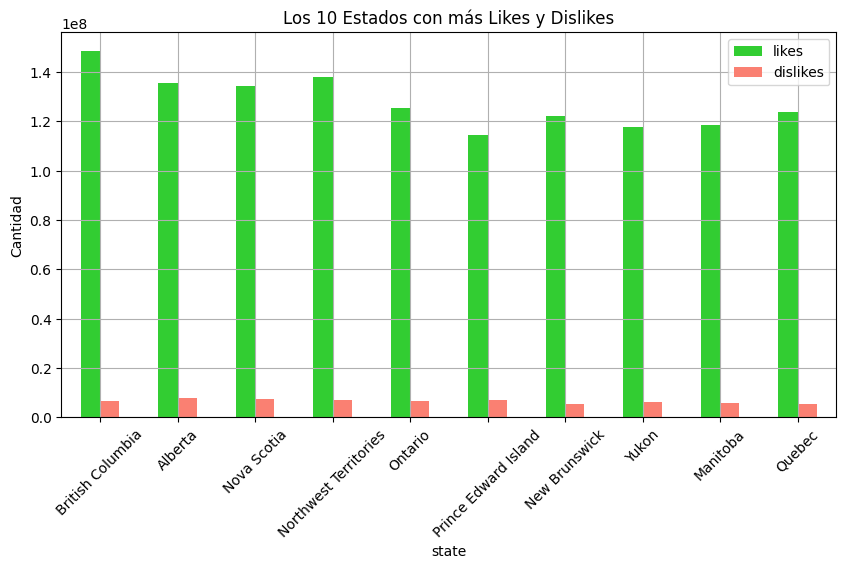

In [ ]:
#¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?
# Agrupar por estado y sumar vistas, likes y dislikes

estado_sum = df.groupby('state')[['views', 'likes', 'dislikes']].sum().sort_values('views', ascending=False).head(10)

# Primer gráfico (solo vistas)
estado_sum['views'].plot(kind='bar', color='skyblue', figsize=(10,4))
plt.title('Los 10 Estados con más Vistas')
plt.ylabel('Cantidad de vistas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Segundo gráfico (likes y dislikes)

estado_sum[['likes', 'dislikes']].plot(kind='bar', figsize=(10,5), color=['limegreen', 'salmon'])
plt.title('Los 10 Estados con más Likes y Dislikes')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

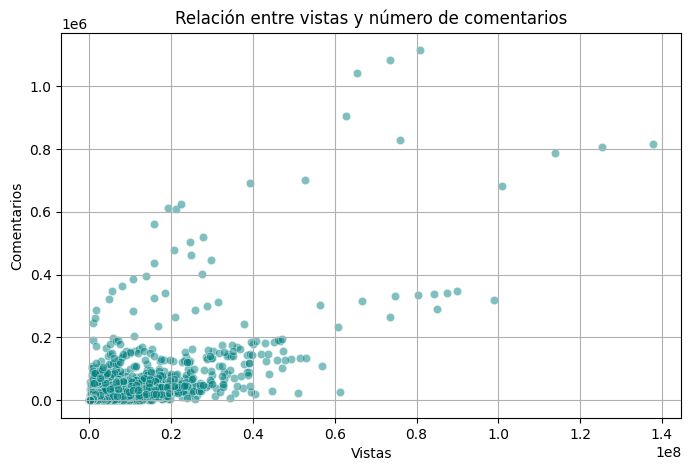

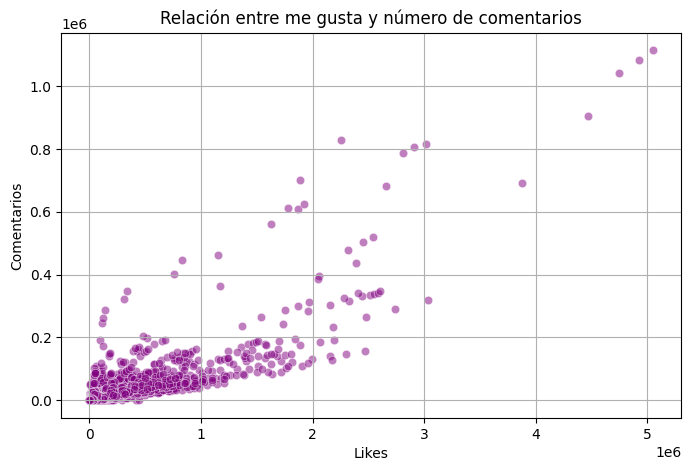

In [ ]:
# ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?
# Correlación entre vistas y comentarios

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='views', y='comment_count', alpha=0.5, color='teal')
plt.title('Relación entre vistas y número de comentarios')
plt.xlabel('Vistas')
plt.ylabel('Comentarios')
plt.grid(True)
plt.show()

# Correlación entre likes y comentarios
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='likes', y='comment_count', alpha=0.5, color='purple')
plt.title('Relación entre me gusta y número de comentarios')
plt.xlabel('Likes')
plt.ylabel('Comentarios')
plt.grid(True)
plt.show()

#Descarga del dataset

In [452]:
from google.colab import files
df.to_csv("final_limpio_dataset.csv", index=False)

